In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\RIDDHI\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [38]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()

In [4]:
dataset = pd.DataFrame(df.data,columns=df.feature_names)

In [5]:
# Combining the target/dependent variable to our dataframe
dataset['MedHouseVal'] = df.target

In [6]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
dataset.shape

(20640, 9)

In [7]:
X = dataset.iloc[:,:-1] # Independent feature
y=dataset.iloc[:,-1] # Dependent feature

# Linear Regression

First we will implement the linear regression and then based on the performace we will compare Ridge and Laso regression performance

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [9]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mse

array([-0.48485857, -0.62249739, -0.64621047, -0.5431996 , -0.49468484])

In [10]:
mean_mse = np.mean(mse)
mean_mse # Remember the mean squared error should always be close to zero, but in this case it's not

-0.5582901717686538

# Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [33]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,100,105,110,500,1000]}
# Note: Alpha value can be any number from zero to any positive value (but it has to be greater than zero)
ridge_regressor = GridSearchCV(ridge,param_grid = parameters,scoring='neg_mean_squared_error',cv=10)
# GridSearch CV helps to select the best parameters for the machine learning model
ridge_regressor.fit(X,y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 100, 105, 110, 500,
                                   1000]},
             scoring='neg_mean_squared_error')

In [34]:
ridge_regressor.best_params_

{'alpha': 100}

In [35]:
ridge_regressor.best_score_

-0.5505461807589808

# Laso Regression

In [15]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [16]:
lasso=Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,105,110]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [17]:
lasso_regressor.fit(X,y)

C:\Users\RIDDHI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.845e+03, tolerance: 2.228e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\RIDDHI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.680e+03, tolerance: 2.256e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\RIDDHI\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.074e+02, toler

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 105, 110]},
             scoring='neg_mean_squared_error')

In [18]:
lasso_regressor.best_params_

{'alpha': 0.001}

In [19]:
lasso_regressor.best_score_

-0.5582759293868981

In [20]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_29660\1196053527.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)
C:\Users\RIDDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MedHouseVal', ylabel='Density'>

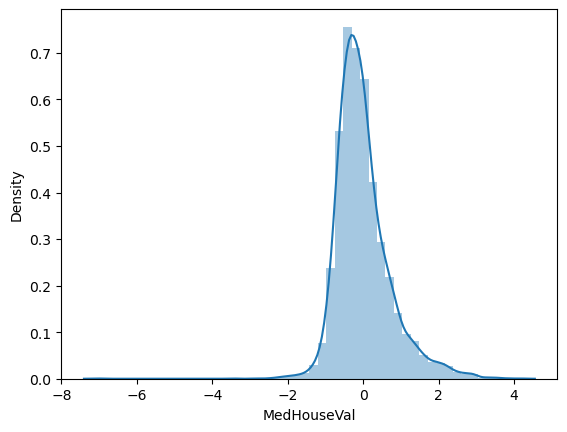

In [22]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

C:\Users\RIDDHI\AppData\Local\Temp\ipykernel_29660\1693200975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_ridge)
C:\Users\RIDDHI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MedHouseVal', ylabel='Density'>

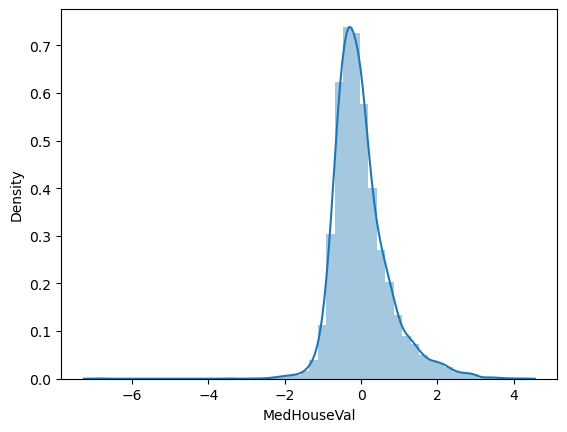

In [23]:
sns.distplot(y_test-prediction_ridge)